In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from masterthesis.utils import load_split, round_cefr_score
from masterthesis.models.report import report

In [3]:
train = load_split('train')
dev = load_split('dev')
data = pd.concat([train, dev])

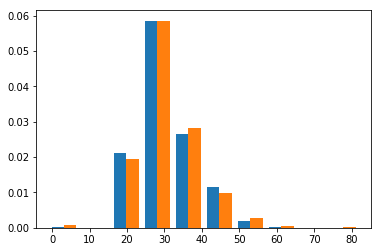

In [4]:
column = 'testlevel'
labels = data[column].unique()
vals = [data[data[column] == l].age for l in labels]
plt.hist(vals, density=True);

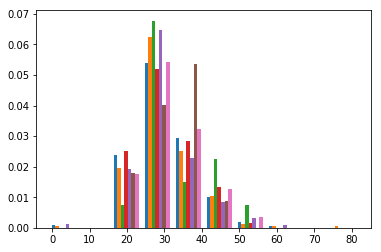

In [5]:
column = 'cefr'
labels = data[column].unique()
vals = [data[data[column] == l].age for l in labels]
plt.hist(vals, density=True);

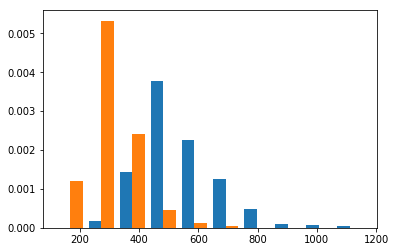

In [6]:
column = 'testlevel'
labels = data[column].unique()
vals = [data[data[column] == l].num_tokens for l in labels]
plt.hist(vals, density=True);

In [7]:
sorted(data.title.unique())

["'Import' av helsepersonell",
 'Adopsjon',
 'Alkohol og alkoholvaner',
 'Barn og fysiske aktiviteter',
 'Barndom og voksenverden',
 'Barneoppdragelse',
 'Bestselgere og bokbransjen',
 'Bilbruk',
 'Bilisme',
 'Boformer',
 'Bolig og bosted',
 'Bolig og boutgifter',
 'Bomiljø',
 'Borgerlønn',
 'Bruk av musikk',
 'Den gode skolen',
 'Den lille forskjellen',
 'Den norske naturen',
 'Det norske monarkiet',
 "Diktet 'Det er langt mellom venner' av Kolbjørn Falkeid",
 "Diktet 'Et møte' av Kolbein Falkeid",
 "Diktet 'Ingen ting' av Paulus Utsi om språk",
 "Diktet 'Mayday' av Lars Saabye Christensen",
 "Diktet 'Privat huskeregel' av Kolbjørn Falkeid",
 "Diktet 'Sannheten' av Rolf Jacobsen",
 "Diktet 'Synsvinkel' av Gunnar Øi",
 "Diktet 'Toleranse'",
 'Eldrebølgen',
 'En bok fra din kultur eller ditt hjemland',
 'En forfatter og om en bok han/ hun har skrevet',
 'En hyggelig opplevelse',
 'En interesse du har',
 'En kjent person',
 'En person som har betydd mye for deg',
 'Enpersons-husholdninge

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, f1_score
import numpy as np

In [9]:
scaler = StandardScaler()
train_x = scaler.fit_transform(train.num_tokens.values.reshape(-1, 1))
dev_x = scaler.transform(dev.num_tokens.values.reshape(-1, 1))

/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
clf = LogisticRegression()
clf.fit(train_x, train.cefr)
pred = clf.predict(dev_x)
print("Macro f1: %.3f" % f1_score(dev.cefr, pred, average='macro'))
print("Weighted f1: %.3f" % f1_score(dev.cefr, pred, average='weighted'))
print("Accuracy: %.3f" % accuracy_score(dev.cefr, pred))
print(classification_report(dev.cefr, pred))

Macro f1: 0.149
Weighted f1: 0.256
Accuracy: 0.390
             precision    recall  f1-score   support

         A2       0.00      0.00      0.00         1
      A2/B1       0.00      0.00      0.00        22
         B1       0.28      0.85      0.42        20
      B1/B2       0.00      0.00      0.00        30
         B2       0.49      0.84      0.62        37
      B2/C1       0.00      0.00      0.00        10
         C1       0.00      0.00      0.00         3

avg / total       0.19      0.39      0.26       123



/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/stig/master-thesis/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
clf.predict([[5]])

array(['B2'], dtype=object)

In [12]:
train['collapsed'] = [round_cefr_score(s) for s in train.cefr]
dev['collapsed'] = [round_cefr_score(s) for s in dev.cefr]

             precision    recall  f1-score   support

         A2       0.00      0.00      0.00         1
      A2/B1       0.00      0.00      0.00        22
         B1       0.16      1.00      0.28        20
      B1/B2       0.00      0.00      0.00        30
         B2       0.00      0.00      0.00        37
      B2/C1       0.00      0.00      0.00        10
         C1       0.00      0.00      0.00         3

avg / total       0.03      0.16      0.05       123

Macro F1: 0.040
Micro F1: 0.163
Weighted F1: 0.045
== Confusion matrix ==
[[ 0  0  1  0  0  0  0]
 [ 0  0 22  0  0  0  0]
 [ 0  0 20  0  0  0  0]
 [ 0  0 30  0  0  0  0]
 [ 0  0 37  0  0  0  0]
 [ 0  0 10  0  0  0  0]
 [ 0  0  3  0  0  0  0]]


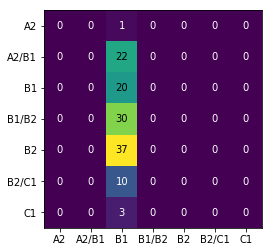

In [13]:
majority_label = train.cefr.value_counts().index[0]
pred = [majority_label for __ in dev.cefr]

labels = sorted(dev.cefr.unique())
report([labels.index(s) for s in dev.cefr],
       [labels.index(s) for s in pred],
       labels)

             precision    recall  f1-score   support

         A2       0.00      0.00      0.00         1
         B1       0.34      1.00      0.51        42
         B2       0.00      0.00      0.00        67
         C1       0.00      0.00      0.00        13

avg / total       0.12      0.34      0.17       123

Macro F1: 0.127
Micro F1: 0.341
Weighted F1: 0.174
== Confusion matrix ==
[[ 0  1  0  0]
 [ 0 42  0  0]
 [ 0 67  0  0]
 [ 0 13  0  0]]


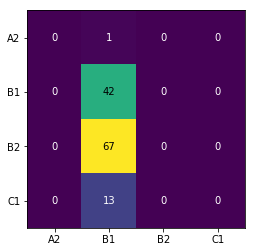

In [14]:
majority_label = train.collapsed.value_counts().index[0]
pred = [majority_label for __ in dev.collapsed]

labels = sorted(dev.collapsed.unique())
report([labels.index(s) for s in dev.collapsed],
       [labels.index(s) for s in pred],
       labels)

# How long sequences should we work with?

We want to have sequences long enough that we have enough information to make a good prediction. Using the maximum length is a simple way to decide, but if the longest document is an outlier we will use a lot of memory to pad the shorter documents.

Let's look at a few different percentiles of document length.

In [25]:
for p in [0.5, 0.75, 0.85, 0.95, 1]:
    print('{:.2f} - {}'.format(p, int(train.num_tokens.quantile(p))))

0.50 - 356
0.75 - 488
0.85 - 560
0.95 - 700
1.00 - 1163


The longest document is 1163 tokens, more than three times as long as the median document. The 95th percentile is less than twice the length of the median document and thus seems like a good choice. Let's compare it to the median + 1.5 * IQR (interquartile range), a common cutoff for outliers:

In [27]:
s = train.num_tokens
s.quantile(0.5) + 1.5 * (s.quantile(0.75) - s.quantile(0.25))

693.125

In [38]:
!wc -c ../ASK/txt/*

   2197 ../ASK/txt/h0001.txt
   2435 ../ASK/txt/h0002.txt
   1942 ../ASK/txt/h0003.txt
   2429 ../ASK/txt/h0004.txt
   2003 ../ASK/txt/h0005.txt
   2367 ../ASK/txt/h0006.txt
   3935 ../ASK/txt/h0007.txt
   3141 ../ASK/txt/h0008.txt
   3699 ../ASK/txt/h0009.txt
   2602 ../ASK/txt/h0010.txt
   2710 ../ASK/txt/h0011.txt
   2874 ../ASK/txt/h0012.txt
   3015 ../ASK/txt/h0013.txt
   2908 ../ASK/txt/h0014.txt
   2362 ../ASK/txt/h0015.txt
   2088 ../ASK/txt/h0016.txt
   2253 ../ASK/txt/h0017.txt
   2270 ../ASK/txt/h0018.txt
   3802 ../ASK/txt/h0019.txt
   2108 ../ASK/txt/h0020.txt
   2452 ../ASK/txt/h0021.txt
   2212 ../ASK/txt/h0022.txt
   1931 ../ASK/txt/h0023.txt
   2298 ../ASK/txt/h0024.txt
   1942 ../ASK/txt/h0025.txt
   2982 ../ASK/txt/h0026.txt
   2192 ../ASK/txt/h0027.txt
   2774 ../ASK/txt/h0028.txt
   2247 ../ASK/txt/h0029.txt
   2293 ../ASK/txt/h0030.txt
   2224 ../ASK/txt/h0031.txt
   1645 ../ASK/txt/h0032.txt
   2085 ../ASK/txt/h0033.txt
   2913 ../ASK/txt/h0034.txt
   1224 ../ASK

NameError: name '_________' is not defined